![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope Climate-DT Polygon example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [3]:
import earthkit.data
import earthkit.plots
from polytope.api import Client

In [1]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [2]:
request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        "type": "polygon",
        "shape": [[41.870881288,-8.8791360], [41.694339317422646, -8.824238614026456], [40.171924585721314, -8.902386975546364], [38.75694209400925, -9.493088042617785], [38.42424252381525, -9.171674240710018], [38.49907333213173, -8.676525850529856], [37.057269459205145, -8.971873318897366], [37.162874354643776, -7.406745406502978], [38.19776118392036, -6.931663452624974], [38.4280922170291, -7.321584397020473], [39.011852875635526, -6.9787177479519755], [39.66227871551288, -7.5393956904523804], [39.66568774825791, -7.03915852435145], [40.0019453234905, -6.883203763416162], [40.20373392742229, -7.035724907677206], [40.350463990828985, -6.8135246275213035], [41.030499770212515, -6.905947651233703], [41.593647729084154, -6.22847017956974], [41.67712153119277, -6.544984134823352], [41.949682257268876, -6.567927092516641], [41.96960294343674, -7.1747800681640115], [41.88337981339092, -7.196871678410446], [41.81334515396762,-8.156666519264604], [42.14242723772878, -8.205142297350534], [41.870881288,-8.8791360]],
    },
}

In [ ]:
data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [7]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 108kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 2244)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2021-01-01 00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 18kB 0 1 2 3 4 5 ... 2238 2239 2240 2241 2242 2243
    latitude   (points) float64 18kB 37.08 37.08 37.08 ... 42.06 42.06 42.11
    longitude  (points) float64 18kB 351.1 351.2 351.3 ... 351.7 351.7 351.7
    levelist   (points) float64 18kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 18kB 2.402 ... 1.536
    2t         (datetimes, number, steps, points) float64 18kB 285.9 ... 278.8
Attributes: (12/15)
    activity:     scenariomip
    class:        d1
    dataset:      climate-dt
    experiment:   ssp3-7.0
    expver:       0001
    generation:   1
    ...           ...
    resolution:   high
    stream:       clte
    type:         fc
    number:       0
    step:         0
    date:         2021-01-01 00:00:00Z

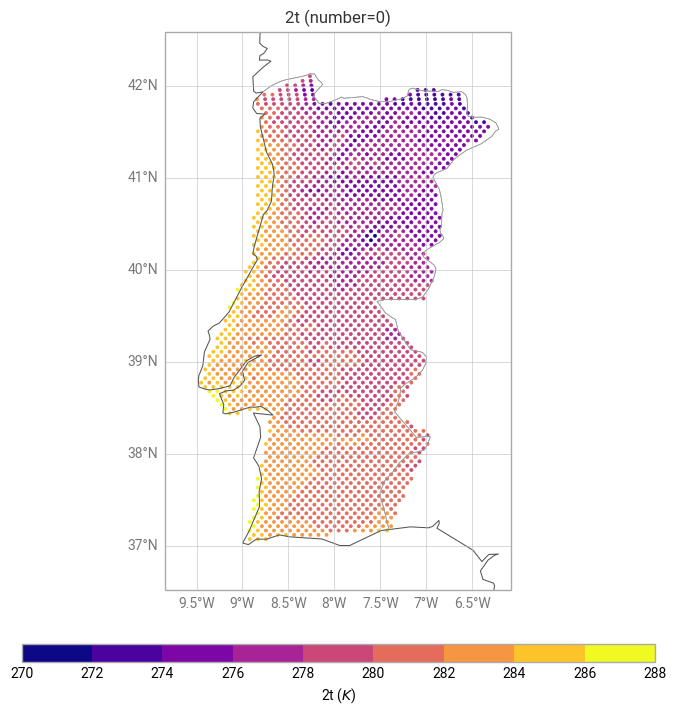

In [ ]:
chart = earthkit.plots.Map(domain="Portugal")
chart.point_cloud(
    ds['2t'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()